# Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Basic EDA

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,81
Number of observations,2051
Total Missing (%),5.9%
Total size in memory,1.3 MiB
Average record size in memory,648.0 B
Numeric,39
Categorical,42
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
df.isnull().sum().sum()

9822

In [6]:
df.shape

(2051, 81)

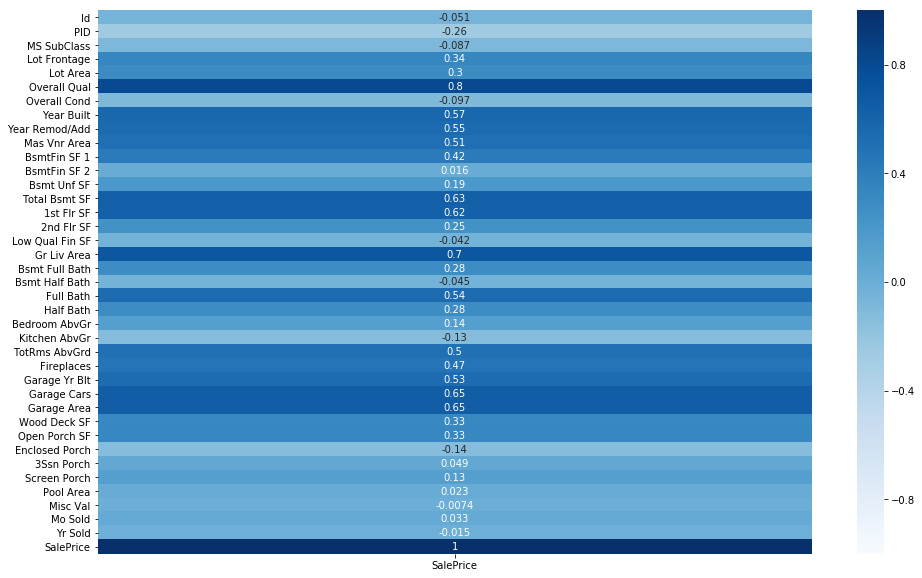

In [7]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr()[['SalePrice']], annot = True, vmin = -1, vmax = 1, cmap = 'Blues');

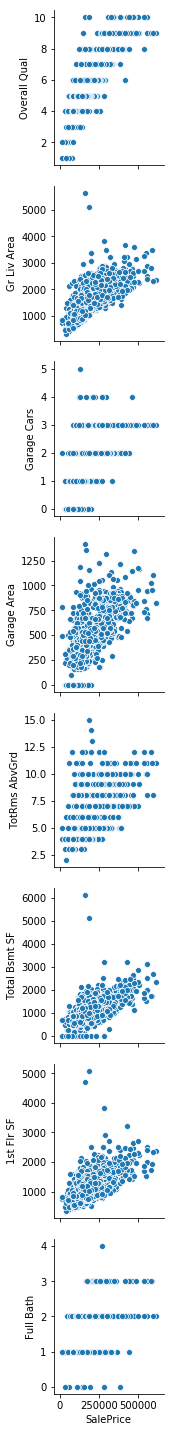

In [8]:
sns.pairplot(df, x_vars = ['SalePrice'], y_vars = ['Overall Qual', 
                                                   'Gr Liv Area', 'Garage Cars',
                                                  'Garage Area', 'TotRms AbvGrd',
                                                  'Total Bsmt SF', '1st Flr SF',
                                                  'Full Bath']);

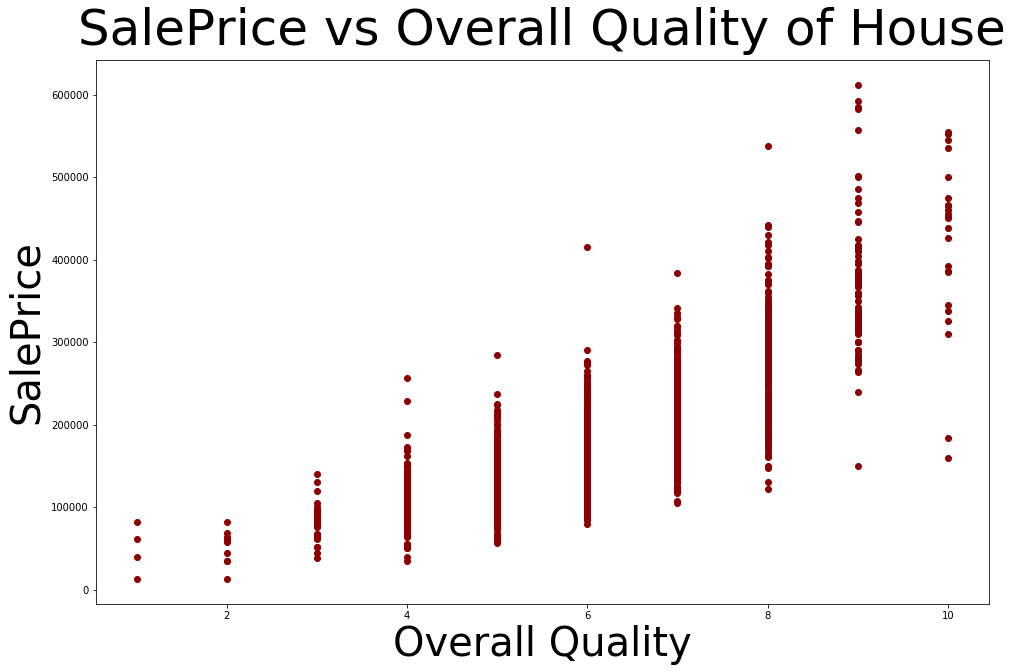

In [12]:
plt.figure(figsize = (16,10))
plt.xlabel('Overall Quality', fontsize = 40);
plt.ylabel('SalePrice', fontsize = 40)
plt.title('SalePrice vs Overall Quality of House', fontsize = 50, pad = 15);

plt.scatter(df['Overall Qual'], df['SalePrice'], color = 'darkred');

# z = np.polyfit(df['Overall Qual'], df['SalePrice'], 1)
# p = np.poly1d(z)
# plt.plot(df['Overall Qual'], p(df['Overall Qual']), "r");

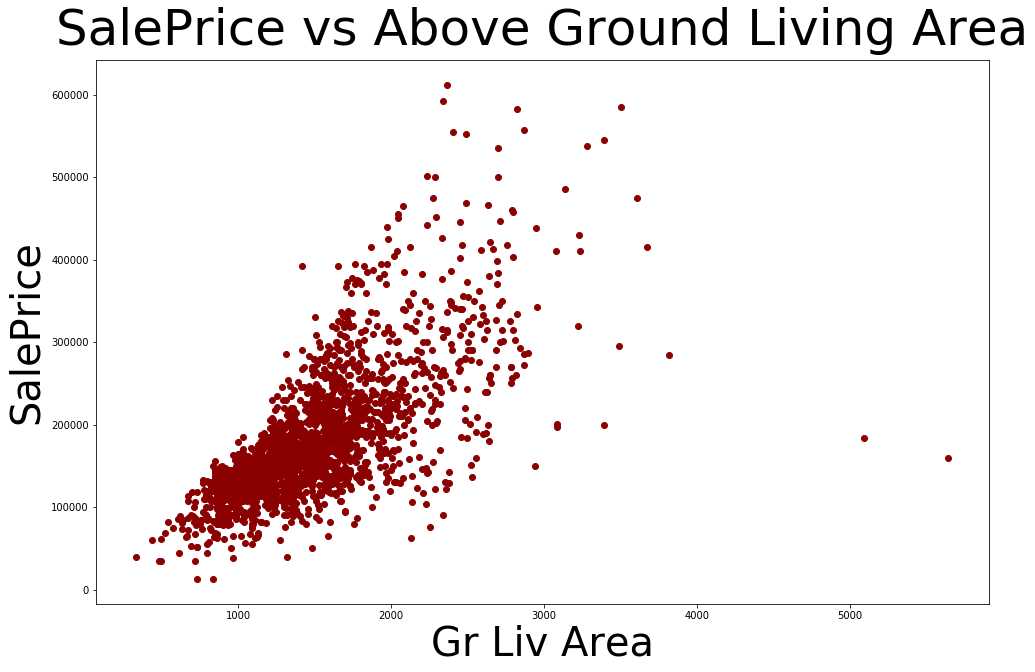

In [15]:
plt.figure(figsize = (16,10))
plt.xlabel('Gr Liv Area', fontsize = 40);
plt.ylabel('SalePrice', fontsize = 40)
plt.title('SalePrice vs Above Ground Living Area', fontsize = 50, pad = 15);

plt.scatter(df['Gr Liv Area'], df['SalePrice'], color = 'darkred');

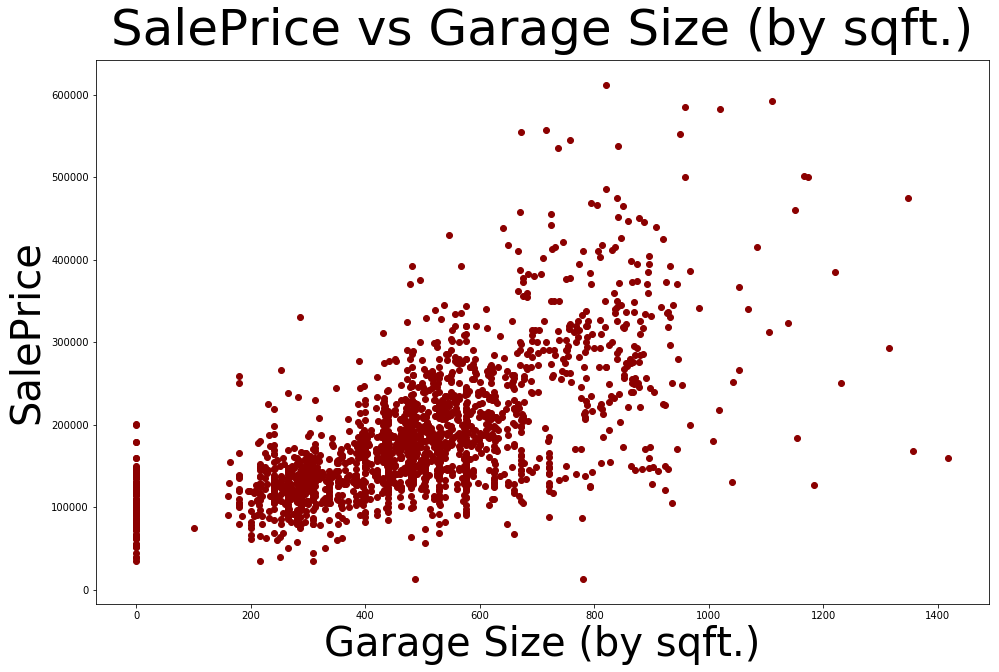

In [17]:
plt.figure(figsize = (16,10))
plt.xlabel('Garage Size (by sqft.)', fontsize = 40);
plt.ylabel('SalePrice', fontsize = 40)
plt.title('SalePrice vs Garage Size (by sqft.)', fontsize = 50, pad = 15);

plt.scatter(df['Garage Area'], df['SalePrice'], color = 'darkred');

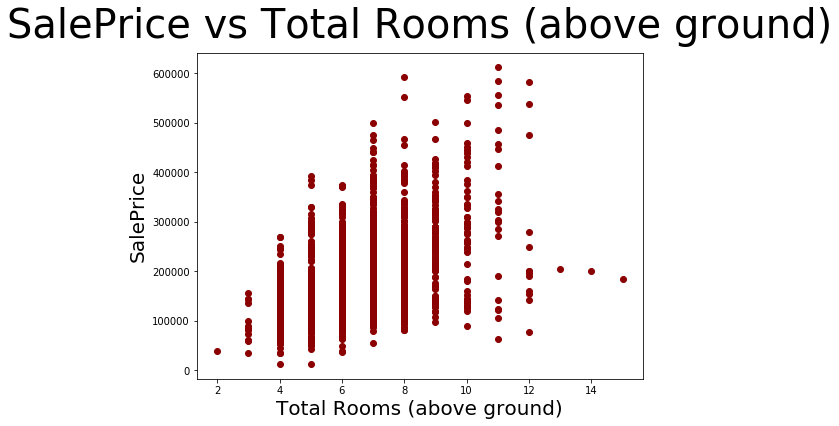

In [27]:
plt.figure(figsize = (8,6))
plt.xlabel('Total Rooms (above ground)', fontsize = 20);
plt.ylabel('SalePrice', fontsize = 20)
plt.title('SalePrice vs Total Rooms (above ground)', fontsize = 40, pad = 15);

plt.scatter(df['TotRms AbvGrd'], df['SalePrice'], color = 'darkred');

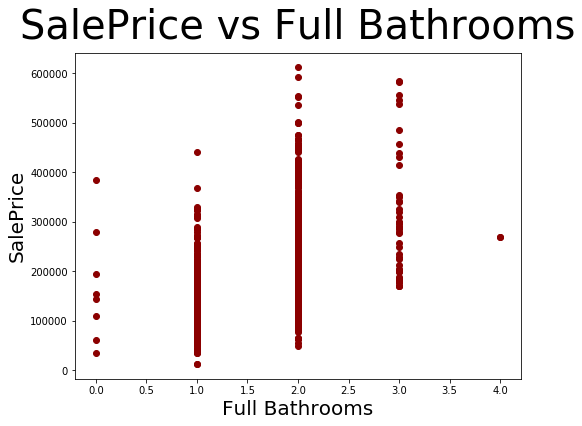

In [28]:
plt.figure(figsize = (8,6))
plt.xlabel('Full Bathrooms', fontsize = 20);
plt.ylabel('SalePrice', fontsize = 20)
plt.title('SalePrice vs Full Bathrooms', fontsize = 40, pad = 15);

plt.scatter(df['Full Bath'], df['SalePrice'], color = 'darkred');

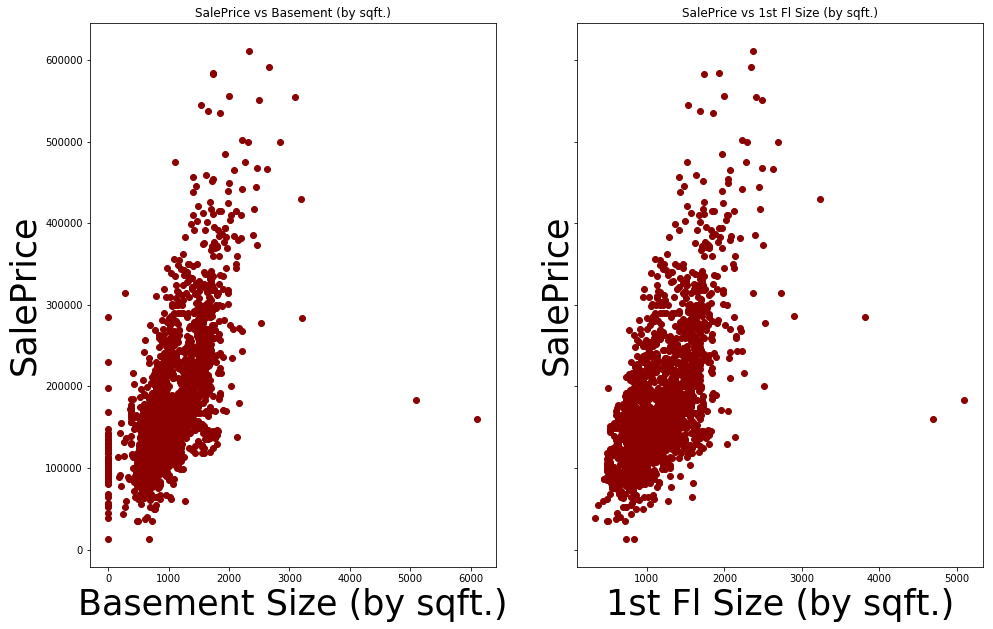

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,10), sharey = True);

ax[0].set_xlabel('Basement Size (by sqft.)', fontsize = 35);
ax[0].set_ylabel('SalePrice', fontsize = 35);
ax[0].title.set_text('SalePrice vs Basement (by sqft.)');
ax[0].scatter(df['Total Bsmt SF'], df['SalePrice'], color = 'darkred');

ax[1].set_xlabel('1st Fl Size (by sqft.)', fontsize = 35);
ax[1].set_ylabel('SalePrice', fontsize = 35);
ax[1].title.set_text('SalePrice vs 1st Fl Size (by sqft.)');
ax[1].scatter(df['1st Flr SF'], df['SalePrice'], color = 'darkred');

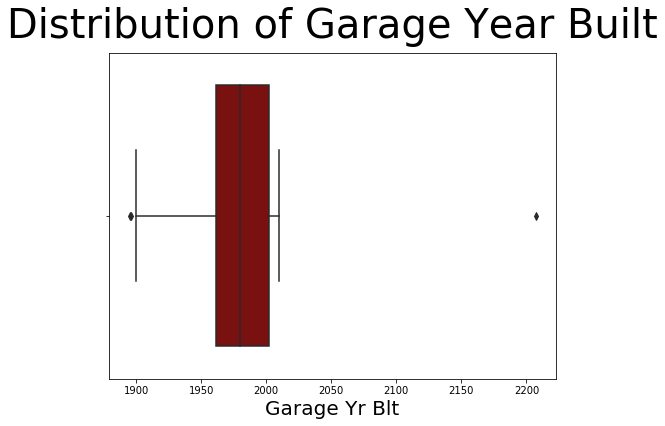

In [15]:
plt.figure(figsize = (8,6))
plt.xlabel('Garage Year Built', fontsize = 20);
plt.title('Distribution of Garage Year Built', fontsize = 40, pad = 15);
sns.boxplot(df['Garage Yr Blt'], color = 'darkred');

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


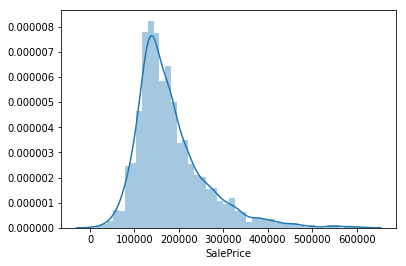

In [16]:
sns.distplot(df['SalePrice']);

In [17]:
df['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [18]:
df['Garage Yr Blt'].replace(2207, 2007, inplace = True)

# Data Cleaning: filling/dropping missing values

**Lot Frontage**

Replaced null values with the 0 under the assumption that a null value in this column means there is no lot.

In [19]:
df['Lot Frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [20]:
lot_frontage_mean = np.mean(df['Lot Frontage'])

In [21]:
df['Lot Frontage'] = df['Lot Frontage'].replace(np.nan, 0)

**Alley**

Data dictionary states that null values in Alley means there is no alley access. Replaced null values with string 'No Alley'.

In [22]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [23]:
df['Alley'] = df["Alley"].replace(np.nan, str('No Alley'))

**Masonry Veneer Type and Masonry Veneer Area in SqFt**

Mas Vnr Type - Replaced Veneer Type 'None'and null values with string 'No Masonry'.

Mas Vnr Area - Replaced Veneer Area with null values with 0.

In [24]:
df[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    22
Mas Vnr Area    22
dtype: int64

In [25]:
print(df['Mas Vnr Type'].unique())
print(df['Mas Vnr Area'].unique())

['BrkFace' 'None' nan 'Stone' 'BrkCmn']
[2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02       nan 3.000e+00 3.360e+02 4.800e+02 3.200e+02
 1.040e+02 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02
 5.220e+02 1.430e+02 3.480e+02 1.170e+02 5.100e+02 1.450e+02 9.600e+01
 6.680e+02 5.000e+01 2.280e+02 6.500e+01 3.610e+02 7.480e+02 1.970e+02
 5.720e+02 1.280e+02 1.200e+02 2.540e+02 8.600e+01 3.000e+01 5.400e+01
 2.460e+02 3.970e+02 2.960e+02 1.440e+02 9.020e+02 2.610e+02 2.600e+02
 2.750e+02 5.700e+01 1.050e+03 3.590e+02 1.080e+02 6.620e+02 5.000e+02
 2.100e+02 1.650e+02 2.080e+02 3.600e+02 1.600e+02 6.400e+01 2.240e+02
 2.060e+02 1.160e+02 6.510e+02 5.040e+02 2.520e+02 3.370e+02 8.400e+01
 3.090e+02 4.660e+02 6.000e+02 1.890e+02 3.680e+02 1.980e+02 1.400e+02
 9.220e+02 1.600e+01 1.800e+01 9.000e+01 4.250e+02 2.450e+02 2.340e+02
 7.660e+02 2.190e+02 1.820e+02 1.360e+02 5.760e+02 2.700e+02 1.500e+02
 2.560e+02 1.760e+02 4.790e+02 6.470e

In [26]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].replace('None', 'No Masonry')
df['Mas Vnr Type'].replace(np.nan, 'No Masonry', inplace = True)

df['Mas Vnr Area'].replace(np.nan, 0, inplace = True)

**Basement**

Bsmt Qual - Renamed all basement height values, replaced all null values with string 'No Basement'

Bsmt Cond - Renamed all basement condition values, replaced all null values with string 'No Basement'

Bsmt Exposure - Renamed all basement exposure values, replaced all null values with string 'No Basement'

BsmtFin Type 1 - Renamed all basement finish areas, replaced all null values with string 'No Basement'

BsmtFin SF 1 - Replaced null values with 0.

BsmtFin Type 2 - Renamed all other finish areas, replaced all null values with string 'No Basement'

BsmtFin SF 2 - Replaced null values with 0.

Bsmt Unf SF - Replaced null values with 0.

Total Bsmt SF - Replaced null values with 0.

Bsmt Full Bath - Replaced null values with 0.

Bsmt Half Bath - Replaced null values with 0.

In [27]:
df['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [28]:
df['Bsmt Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
                         
df[['Bsmt Qual']].head()

,Bsmt Qual
0,3
1,4
2,3
3,4
4,2


In [29]:
df['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [30]:
df['Bsmt Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
                         
df[['Bsmt Cond']].head()

,Bsmt Cond
0,3
1,3
2,3
3,3
4,4


In [31]:
# Replaced null value with string 'No' to equate null value with 'No Exposure'

df['Bsmt Exposure'].replace(np.nan, 'No', inplace = True)

In [32]:
df['Bsmt Exposure'].replace({'Av': 2,
                         'Gd': 3,
                         'Mn': 1,
                         'No': 0}, inplace = True)


df[['Bsmt Exposure']].head()

,Bsmt Exposure
0,0
1,0
2,0
3,0
4,0


In [33]:
df['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [34]:
df['BsmtFin Type 1'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)

df[['BsmtFin Type 1']].head()

,BsmtFin Type 1
0,6
1,6
2,6
3,1
4,1


In [35]:
df['BsmtFin SF 1'].sort_values().isnull().sum()

df['BsmtFin SF 1'].replace(np.nan, 0, inplace = True)
df['BsmtFin SF 1'].sort_values().isnull().sum()

0

In [36]:
df['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [37]:
df['BsmtFin Type 2'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)
df[['BsmtFin Type 2']].head()

,BsmtFin Type 2
0,1
1,1
2,1
3,1
4,1


In [38]:
df['BsmtFin SF 2'].sort_values().isnull().sum()

df['BsmtFin SF 2'].replace(np.nan, 0, inplace = True)

df['BsmtFin SF 2'].sort_values().isnull().sum()

0

In [39]:
df['Bsmt Unf SF'].isnull().sum()

df['Bsmt Unf SF'].replace(np.nan, 0, inplace = True)

df['Bsmt Unf SF'].isnull().sum()

0

In [40]:
df['Total Bsmt SF'].isnull().sum()

df['Total Bsmt SF'].replace(np.nan, 0, inplace = True)

df['Total Bsmt SF'].isnull().sum()

0

In [41]:
df['Bsmt Full Bath'].isnull().sum()

df['Bsmt Full Bath'].replace(np.nan, 0, inplace = True)

df['Bsmt Full Bath'].isnull().sum()

0

In [42]:
df['Bsmt Half Bath'].isnull().sum()

df['Bsmt Half Bath'].replace(np.nan, 0, inplace = True)

df['Bsmt Half Bath'].isnull().sum()

0

**Fireplace Quality**

Renamed all fireplace quality values and replaced all null values with string 'No Fireplace'

In [43]:
df['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [44]:
df['Fireplace Qu'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df[['Fireplace Qu']].head()

,Fireplace Qu
0,0
1,3
2,0
3,0
4,0


**Garage**

Garage Type - Renamed all garage location values and replaced all null values with string 'No Garage'

Garage Yr Blt - Replaced all null values with the mean value of year built which was rounded up to 1979

Garage Finish - Renamed all garage finish quality values, replaced all null values with string 'No Garage'

Garage Cars - Replace single null value

Garage Area - Replace single null value

Garage Qual - Rename all garage quality values, replaced all null values with string 'No Garage'

Garage Cond - Rename all garage condition values, replaced all null values with string 'No Garage'

In [45]:
df['Garage Type'].isnull().sum()

113

In [46]:
df['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [47]:
df['Garage Type'].replace({'Attchd': 'Attached to home',
                          'Detchd': 'Detached from home',
                          'Builtin': 'Built in',
                          'Basment': 'Basement Garage',
                          '2Types': 'More than 1 type',
                          'CarPort': 'Car Port',
                          np.nan: 'No Garage'}, inplace = True)

df[['Garage Type']].head()

,Garage Type
0,Attached to home
1,Attached to home
2,Detached from home
3,BuiltIn
4,Detached from home


In [48]:
df['Garage Yr Blt'].isnull().sum()

114

In [49]:
df['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 1933., 1895.,
       1919.])

In [50]:
np.mean(df['Garage Yr Blt'])
# rounds to 1979

df['Garage Yr Blt'].replace(np.nan, 1979, inplace = True)

In [51]:
df['Garage Finish'].isnull().sum()

114

In [52]:
df['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [53]:
df['Garage Finish'].replace({'RFn': 2,
                            'Unf': 1,
                            'Fin': 3,
                            np.nan: 0}, inplace = True)

df[['Garage Finish']].head()

,Garage Finish
0,2
1,2
2,1
3,3
4,1


In [54]:
df['Garage Cars'].isnull().sum()

df['Garage Cars'].replace(np.nan, 0, inplace = True)

df['Garage Cars'].isnull().sum()

0

In [55]:
df['Garage Area'].isnull().sum()

df['Garage Area'].replace(np.nan, 0, inplace = True)

df['Garage Area'].isnull().sum()

0

In [56]:
df['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [57]:
df['Garage Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df[['Garage Qual']].head()

,Garage Qual
0,3
1,3
2,3
3,3
4,3


In [58]:
df['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [59]:
df['Garage Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df[['Garage Cond']].head()

,Garage Cond
0,3
1,3
2,3
3,3
4,3


**Pool Quality**

Renamed all pool quality features and replaced null values with string 'No Pool'

In [60]:
df['Pool QC'].isnull().sum()

2042

In [61]:
df['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [62]:
df['Pool QC'].replace({'TA': 2,
                         'Gd': 3,
                         'Ex': 4,
                         'Fa': 1,
                         np.nan: 0}, inplace = True)

df[['Pool QC']].head()

,Pool QC
0,0
1,0
2,0
3,0
4,0


**Fence**

Rename all fence quality values and replace null values with string 'No Fence'

In [63]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [64]:
df['Fence'].replace({'GdPrv': 'Good Privacy',
                    'MnPrv': 'Minimum Privacy',
                    'GdWo': 'Good Wood',
                    'MnWw': 'Minimum Wood/Wire',
                    np.nan: 'No Fence'}, inplace = True)
df[['Fence']].head()

,Fence
0,No Fence
1,No Fence
2,No Fence
3,No Fence
4,No Fence


**Miscellaneous Features**

Rename all miscellaneous features values and replace all null values with string 'No Extras'

In [65]:
df['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [66]:
df['Misc Feature'].replace({np.nan: 'No Extras',
                           'Shed': 'Shed',
                           'TenC': 'Tennis Court',
                           'Gar2': '2nd Garage',
                           'Othr': 'Other',
                           'Elev': 'Elevator'}, inplace = True)

df[['Misc Feature']].head()

,Misc Feature
0,No Extras
1,No Extras
2,No Extras
3,No Extras
4,No Extras


**Stored all cleaned features in a variable.**

In [67]:
cleaned_features = df[['Lot Frontage', 'Alley', 'Mas Vnr Area', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
   'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
   'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']]

In [68]:
df['Lot Frontage * Lot Area'] = df['Lot Frontage'] * df['Lot Area']

df['Full Bath * Half Bath'] = df['Full Bath'] * df['Half Bath']

df['Garage Cars * Garage Area'] = df['Garage Cars'] * df['Garage Area']

df['Wood Deck * Open Porch'] = df['Wood Deck SF'] * df['Open Porch SF']

### Making changes to Test CSV to mirror Train CSV

In [69]:
df_to_kaggle = pd.read_csv('../data/test.csv')
df_to_kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


**Lot Frontage**

Replaced null values with the 0 under the assumption that a null value in this column means there is no lot.

In [70]:
df_to_kaggle['Lot Frontage'].unique()

array([ 69.,  nan,  58.,  60.,  21.,  52.,  39.,  75.,  50.,  68.,  80.,
       121.,  51.,  65.,  74.,  73.,  40.,  46.,  61.,  85., 136.,  34.,
        70.,  59., 130., 100.,  77., 131.,  67.,  79.,  98.,  53.,  95.,
        37., 106.,  90., 120.,  72.,  76., 118.,  24.,  78.,  86., 102.,
        66., 112.,  63.,  57., 110.,  89., 103., 105.,  48.,  43., 160.,
        31.,  55.,  84.,  44., 150.,  35.,  64.,  71., 122., 174.,  49.,
        47.,  93.,  56., 149.,  87., 168.,  82.,  36.,  41.,  96.,  88.,
        83.,  45.,  94.,  54.,  30., 124.,  81.,  42., 152., 115., 113.,
       101., 104., 116.,  62., 114., 107.,  33.,  99.,  91.,  97., 126.,
        28., 108., 133.,  32.,  92., 182.])

In [71]:
lot_frontage_mean = np.mean(df_to_kaggle['Lot Frontage'])

In [72]:
df_to_kaggle['Lot Frontage'] = df_to_kaggle['Lot Frontage'].replace(np.nan, 0)

**Alley**

Data dictionary states that null values in Alley means there is no alley access. Replaced null values with string 'No Alley'.

In [73]:
df_to_kaggle['Alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [74]:
df_to_kaggle['Alley'] = df_to_kaggle["Alley"].replace(np.nan, str('No Alley'))

**Masonry Veneer Type and Masonry Veneer Area in SqFt**

Mas Vnr Type - Replaced Veneer Type 'None'and null values with string 'No Masonry'.

Mas Vnr Area - Replaced Veneer Area with null values with 0.

In [75]:
df_to_kaggle[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    1
Mas Vnr Area    1
dtype: int64

In [76]:
print(df_to_kaggle['Mas Vnr Type'].unique())
print(df_to_kaggle['Mas Vnr Area'].unique())

['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]
[   0.  247.   23.   98.  104.  156.  180.   44.   76.   70.  352.  162.
  444.  495.  340.  634.  182.  147.  108.   20.  423.  178.  359.  762.
   75.  161.  674.  100.  306.  509.  653.  450.  360.  680.  112.   72.
  440. 1378.  304.  364.  754.  788.  230.  368.  120.  113.  216.  371.
  153.  151.  396.  215.  472.  500.  468.   14.   50.   96.   99.  342.
  174.  310.  114.   74.  270.  260.  123.  218.  415.  921.  771.  726.
   16.  362.  473.  870. 1224.  285.  420.  137.  259.   82.  632.  170.
  408.   53.  532.  286.  206.  308.  405.  128.  236.  350.  302.  256.
  657.  194.  567.  116.   65.  305.  188.  281.  300.  198.   95.  481.
  226.  459.  480.  422.  877.  166.  149.  190.  189.  492.  205.  130.
  250.  223.  280.  435.  229.  438.  975.   67.  150.  196.   80.  380.
   94.  594.  288.  209.   54.  266. 1170.  227.  240.   89.  246.  263.
  169.  621.  252.   18.  232.  200.   90.  432.  144.  284.  143.  456.
  

In [77]:
df_to_kaggle['Mas Vnr Type'] = df_to_kaggle['Mas Vnr Type'].replace('None', 'No Masonry')
df_to_kaggle['Mas Vnr Type'].replace(np.nan, 'No Masonry', inplace = True)

df_to_kaggle['Mas Vnr Area'].replace(np.nan, 0, inplace = True)

**Basement**

Bsmt Qual - Renamed all basement height values, replaced all null values with string 'No Basement'

Bsmt Cond - Renamed all basement condition values, replaced all null values with string 'No Basement'

Bsmt Exposure - Renamed all basement exposure values, replaced all null values with string 'No Basement'

BsmtFin Type 1 - Renamed all basement finish areas, replaced all null values with string 'No Basement'

BsmtFin SF 1 - Replaced null values with 0.

BsmtFin Type 2 - Renamed all other finish areas, replaced all null values with string 'No Basement'

BsmtFin SF 2 - Replaced null values with 0.

Bsmt Unf SF - Replaced null values with 0.

Total Bsmt SF - Replaced null values with 0.

Bsmt Full Bath - Replaced null values with 0.

Bsmt Half Bath - Replaced null values with 0.

In [78]:
df_to_kaggle['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [79]:
df_to_kaggle['Bsmt Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
                         
df_to_kaggle[['Bsmt Qual']].head()

,Bsmt Qual
0,2
1,4
2,4
3,3
4,4


In [80]:
df_to_kaggle['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [81]:
df_to_kaggle['Bsmt Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
                         
df_to_kaggle[['Bsmt Cond']].head()

,Bsmt Cond
0,3
1,3
2,4
3,3
4,3


In [82]:
# Replaced null value with string 'No' to equate null value with 'No Exposure'

df_to_kaggle['Bsmt Exposure'].replace(np.nan, 'No', inplace = True)

In [83]:
df_to_kaggle['Bsmt Exposure'].replace({'Av': 2,
                         'Gd': 3,
                         'Mn': 1,
                         'No': 0}, inplace = True)


df_to_kaggle[['Bsmt Exposure']].head()

,Bsmt Exposure
0,0
1,0
2,2
3,0
4,0


In [84]:
df_to_kaggle['BsmtFin Type 1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ'], dtype=object)

In [85]:
df_to_kaggle['BsmtFin Type 1'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)

df_to_kaggle[['BsmtFin Type 1']].head()

,BsmtFin Type 1
0,1
1,1
2,6
3,1
4,4


In [86]:
df_to_kaggle['BsmtFin SF 1'].sort_values().isnull().sum()

df_to_kaggle['BsmtFin SF 1'].replace(np.nan, 0, inplace = True)
df_to_kaggle['BsmtFin SF 1'].sort_values().isnull().sum()

0

In [87]:
df_to_kaggle['BsmtFin Type 2'].unique()

array(['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ'], dtype=object)

In [88]:
df_to_kaggle['BsmtFin Type 2'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)
df_to_kaggle[['BsmtFin Type 2']].head()

,BsmtFin Type 2
0,1
1,1
2,1
3,1
4,1


In [89]:
df_to_kaggle['BsmtFin SF 2'].sort_values().isnull().sum()

df_to_kaggle['BsmtFin SF 2'].replace(np.nan, 0, inplace = True)

df_to_kaggle['BsmtFin SF 2'].sort_values().isnull().sum()

0

In [90]:
df_to_kaggle['Bsmt Unf SF'].isnull().sum()

df_to_kaggle['Bsmt Unf SF'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Bsmt Unf SF'].isnull().sum()

0

In [91]:
df_to_kaggle['Total Bsmt SF'].isnull().sum()

df_to_kaggle['Total Bsmt SF'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Total Bsmt SF'].isnull().sum()

0

In [92]:
df_to_kaggle['Bsmt Full Bath'].isnull().sum()

df_to_kaggle['Bsmt Full Bath'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Bsmt Full Bath'].isnull().sum()

0

In [93]:
df_to_kaggle['Bsmt Half Bath'].isnull().sum()

df_to_kaggle['Bsmt Half Bath'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Bsmt Half Bath'].isnull().sum()

0

**Fireplace Quality**

Renamed all fireplace quality values and replaced all null values with string 'No Fireplace'

In [94]:
df_to_kaggle['Fireplace Qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [95]:
df_to_kaggle['Fireplace Qu'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df_to_kaggle[['Fireplace Qu']].head()

,Fireplace Qu
0,0
1,0
2,4
3,0
4,4


**Garage**

Garage Type - Renamed all garage location values and replaced all null values with string 'No Garage'

Garage Yr Blt - Replaced all null values with the mean value of year built which was rounded up to 1979

Garage Finish - Renamed all garage finish quality values, replaced all null values with string 'No Garage'

Garage Cars - Replace single null value

Garage Area - Replace single null value

Garage Qual - Rename all garage quality values, replaced all null values with string 'No Garage'

Garage Cond - Rename all garage condition values, replaced all null values with string 'No Garage'

In [96]:
df_to_kaggle['Garage Type'].isnull().sum()

44

In [97]:
df_to_kaggle['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', nan, '2Types', 'CarPort', 'Basment'],
      dtype=object)

In [98]:
df_to_kaggle['Garage Type'].replace({'Attchd': 'Attached to home',
                          'Detchd': 'Detached from home',
                          'Builtin': 'Built in',
                          'Basment': 'Basement Garage',
                          '2Types': 'More than 1 type',
                          'CarPort': 'Car Port',
                          np.nan: 'No Garage'}, inplace = True)

df_to_kaggle[['Garage Type']].head()

,Garage Type
0,Detached from home
1,Attached to home
2,Attached to home
3,Detached from home
4,Attached to home


In [99]:
df_to_kaggle['Garage Yr Blt'].isnull().sum()

45

In [100]:
df_to_kaggle['Garage Yr Blt'].unique()

array([1910., 1977., 2006., 1935., 1963., 1972., 1959., 1978., 2004.,
       1980., 1991., 1993., 1954., 2000., 1943., 1957., 1940., 1956.,
       1961., 1925., 1968., 1982., 1969., 2007., 1989., 1920., 1937.,
         nan, 1979., 1962., 1950., 1973., 2001., 1952., 1953., 1999.,
       2009., 1998., 1974., 1951., 1987., 2003., 1924., 1970., 1975.,
       1958., 1971., 1992., 1994., 2005., 1960., 1967., 2002., 1997.,
       1981., 1938., 1988., 1939., 1927., 1984., 1964., 1995., 2008.,
       1966., 1941., 1983., 1906., 1930., 1955., 1946., 1996., 1928.,
       1976., 1915., 1923., 1965., 1947., 1900., 1918., 1934., 1932.,
       1986., 2010., 1985., 1949., 1948., 1917., 1990., 1921., 1926.,
       1931., 1916., 1922., 1908.])

In [101]:
np.mean(df_to_kaggle['Garage Yr Blt'])
# rounds to 1977

df_to_kaggle['Garage Yr Blt'].replace(np.nan, 1977, inplace = True)

In [102]:
df_to_kaggle['Garage Finish'].isnull().sum()

45

In [103]:
df_to_kaggle['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [104]:
df_to_kaggle['Garage Finish'].replace({'RFn': 2,
                            'Unf': 1,
                            'Fin': 3,
                            np.nan: 0}, inplace = True)

df_to_kaggle[['Garage Finish']].head()

,Garage Finish
0,1
1,3
2,2
3,1
4,2


In [105]:
df_to_kaggle['Garage Cars'].isnull().sum()

df_to_kaggle['Garage Cars'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Garage Cars'].isnull().sum()

0

In [106]:
df_to_kaggle['Garage Area'].isnull().sum()

df_to_kaggle['Garage Area'].replace(np.nan, 0, inplace = True)

df_to_kaggle['Garage Area'].isnull().sum()

0

In [107]:
df_to_kaggle['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', nan, 'Gd'], dtype=object)

In [108]:
df_to_kaggle['Garage Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df_to_kaggle[['Garage Qual']].head()

,Garage Qual
0,1
1,3
2,3
3,2
4,3


In [109]:
df_to_kaggle['Garage Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df_to_kaggle[['Garage Cond']].head()

,Garage Cond
0,1
1,3
2,3
3,3
4,3


**Pool Quality**

Renamed all pool quality features and replaced null values with string 'No Pool'

In [110]:
df_to_kaggle['Pool QC'].isnull().sum()

875

In [111]:
df_to_kaggle['Pool QC'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

In [112]:
df_to_kaggle['Pool QC'].replace({'TA': 2,
                         'Gd': 3,
                         'Ex': 4,
                         'Fa': 1,
                         np.nan: 0}, inplace = True)

df_to_kaggle[['Pool QC']].head()

,Pool QC
0,0
1,0
2,0
3,0
4,0


**Fence**

Rename all fence quality values and replace null values with string 'No Fence'

In [113]:
df_to_kaggle['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [114]:
df_to_kaggle['Fence'].replace({'GdPrv': 'Good Privacy',
                    'MnPrv': 'Minimum Privacy',
                    'GdWo': 'Good Wood',
                    'MnWw': 'Minimum Wood/Wire',
                    np.nan: 'No Fence'}, inplace = True)
df_to_kaggle[['Fence']].head()

,Fence
0,No Fence
1,No Fence
2,No Fence
3,No Fence
4,No Fence


**Miscellaneous Features**

Rename all miscellaneous features values and replace all null values with string 'No Extras'

In [115]:
df_to_kaggle['Misc Feature'].unique()

array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object)

In [116]:
df_to_kaggle['Misc Feature'].replace({np.nan: 'No Extras',
                           'Shed': 'Shed',
                           'TenC': 'Tennis Court',
                           'Gar2': '2nd Garage',
                           'Othr': 'Other',
                           'Elev': 'Elevator'}, inplace = True)

df_to_kaggle[['Misc Feature']].head()

,Misc Feature
0,No Extras
1,No Extras
2,No Extras
3,No Extras
4,No Extras


**Stored all cleaned features in a variable.**

In [117]:
cleaned_features2 = df_to_kaggle[['Lot Frontage', 'Alley', 'Mas Vnr Area', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
   'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
   'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']]

In [118]:
df_to_kaggle.isnull().sum().sum()    # Check to see if there are any more null values in test CSV
                                     # Found that there was 1 left

df_to_kaggle.isnull().sum().sort_values()   # Found that there was 1 null value in Electrical column

df_to_kaggle['Electrical'].replace(np.nan, 'Mix', inplace = True)   # Replaced null value with 'Mix'

In [119]:
df_to_kaggle['Lot Frontage * Lot Area'] = df_to_kaggle['Lot Frontage'] * df_to_kaggle['Lot Area']

df_to_kaggle['Full Bath * Half Bath'] = df_to_kaggle['Full Bath'] * df_to_kaggle['Half Bath']

df_to_kaggle['Garage Cars * Garage Area'] = df_to_kaggle['Garage Cars'] * df_to_kaggle['Garage Area']

df_to_kaggle['Wood Deck * Open Porch'] = df_to_kaggle['Wood Deck SF'] * df_to_kaggle['Open Porch SF']

**After all changes were made to the TEST_CSV to mirror the TRAIN_CSV, we see that there is still a one-column difference between the two datasets because the `SalePrice` column is not in the TEST_CSV. We must now append a new `SalePrice` column to the TEST_CSV to make Kaggle submissions.**

In [120]:
df_to_kaggle.shape

(879, 84)

In [121]:
df.shape

(2051, 85)

# Feature Engineering
### Interaction Terms

Looking through a correlation table of the numerical columns to see if there are any notable columns to:

* create interaction terms/polynomial features
* check for multicollinearity

In [122]:
pd.set_option('display.max_column', 81)
df.corr().T.tail()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,SalePrice,Lot Frontage * Lot Area,Full Bath * Half Bath,Garage Cars * Garage Area,Wood Deck * Open Porch
SalePrice,-0.051398,-0.255052,-0.087335,0.181456,0.296566,0.800207,-0.097019,0.571849,0.550370,0.503579,0.612188,0.225075,0.413408,0.350362,0.423856,0.014070,0.016432,0.190861,0.629303,0.618486,0.248452,-0.041594,0.697038,0.283332,-0.045290,0.537969,0.283001,0.137067,-0.125444,0.504014,0.471093,0.538925,0.522655,0.557839,0.647781,0.649897,0.285281,0.265021,0.326490,0.333476,-0.135656,0.048732,0.134581,0.023106,0.030585,-0.007375,0.032735,-0.015203,1.000000,0.232599,0.375064,0.690596,0.352388
Lot Frontage * Lot Area,0.003397,-0.020854,-0.161946,0.730782,0.450074,0.147480,-0.045269,0.059074,0.075776,0.165841,0.060541,-0.030824,0.174816,0.012591,0.234205,0.000360,0.020086,0.072256,0.318917,0.396532,0.021786,0.009294,0.333606,0.095336,-0.017664,0.093213,0.047940,0.101878,-0.013584,0.253881,0.166634,0.143716,0.044463,0.111605,0.186169,0.268256,0.054991,0.048767,0.106047,0.170649,-0.013605,0.006508,0.047629,0.260068,0.302426,0.089643,-0.008018,-0.007634,0.232599,1.000000,0.062795,0.265819,0.245814
Full Bath * Half Bath,-0.052163,-0.189045,0.172888,-0.020334,0.074657,0.343872,-0.126953,0.355892,0.304425,0.205624,0.295540,0.098040,-0.018921,0.046695,-0.006892,-0.040452,-0.036548,-0.001140,-0.021594,-0.072734,0.697713,-0.036757,0.532091,-0.023761,-0.067868,0.380801,0.911703,0.310354,-0.018039,0.425330,0.222036,0.235342,0.325944,0.312776,0.312062,0.247681,0.123918,0.118653,0.149032,0.222316,-0.116808,-0.027947,0.030119,0.007422,0.012668,0.053413,0.032083,0.003456,0.375064,0.062795,1.000000,0.276646,0.207590
Garage Cars * Garage Area,-0.042653,-0.191279,-0.074750,0.192205,0.252808,0.582442,-0.174526,0.484222,0.412263,0.414666,0.445776,0.122104,0.309514,0.224496,0.314036,-0.025038,-0.013954,0.183847,0.498649,0.502813,0.151324,-0.051541,0.521774,0.205454,-0.031747,0.432972,0.193605,0.100006,0.002821,0.401340,0.281581,0.352072,0.502489,0.464437,0.905964,0.932959,0.353831,0.340156,0.248156,0.244507,-0.115371,0.033779,0.053904,0.038251,0.038918,0.026695,0.027727,-0.008278,0.690596,0.265819,0.276646,1.000000,0.296537
Wood Deck * Open Porch,0.008463,-0.069986,-0.033376,0.105322,0.212593,0.297442,-0.055557,0.217514,0.209275,0.241962,0.233711,0.057849,0.199388,0.120666,0.236934,0.007525,0.024489,0.063166,0.314338,0.343831,0.154181,-0.017022,0.401783,0.125271,0.018063,0.219780,0.163605,0.064474,-0.064510,0.296729,0.212696,0.223269,0.218088,0.233812,0.260274,0.280524,0.103738,0.100424,0.546403,0.462194,-0.089167,-0.011053,-0.042726,0.233101,0.216216,0.292997,0.053967,-0.027405,0.352388,0.245814,0.207590,0.296537,1.000000


**Interaction terms**

In [123]:
df['Lot Frontage * Lot Area'] = df['Lot Frontage'] * df['Lot Area']

df['Full Bath * Half Bath'] = df['Full Bath'] * df['Half Bath']

df['Garage Cars * Garage Area'] = df['Garage Cars'] * df['Garage Area']

df['Wood Deck * Open Porch'] = df['Wood Deck SF'] * df['Open Porch SF']


Setting num_features = all of the numerical columns and interaction terms to be used later in modeling.

In [124]:
num_features = ['Lot Frontage * Lot Area', 'Overall Qual', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 
                 'Gr Liv Area', 'Full Bath * Half Bath', 'TotRms AbvGrd', 'Fireplaces', 
                 'Garage Cars * Garage Area', 'Garage Yr Blt', 'Wood Deck * Open Porch']

# Modeling - Linear Regression

### Early Kaggle Submission (no data cleaning)

In [125]:
features = ['Overall Qual', 'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built', 'Year Remod/Add',
            'Full Bath']
X = df[features]
y = df['SalePrice']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [127]:
print(X_train.shape)
print(X_test.shape)

(1538, 7)
(513, 7)


In [128]:
lr = LinearRegression()

cross_val_score(lr, X_train, y_train).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7633333500475921

In [129]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8102214463445284

In [130]:
df_to_pred = pd.read_csv('../data/test.csv')

In [131]:
df_to_pred.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [132]:
X_holdout = df_to_pred[features]
X_holdout.head(1)

,Overall Qual,Gr Liv Area,TotRms AbvGrd,1st Flr SF,Year Built,Year Remod/Add,Full Bath
0,6,1928,9,908,1910,1950,2


In [133]:
X_holdout_preds = lr.predict(X_holdout)
X_holdout['SalePrice'] = X_holdout_preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [134]:
X_holdout.head()

,Overall Qual,Gr Liv Area,TotRms AbvGrd,1st Flr SF,Year Built,Year Remod/Add,Full Bath,SalePrice
0,6,1928,9,908,1910,1950,2,155236.491215
1,5,1967,10,1967,1977,1977,2,202703.066751
2,7,1496,7,664,2006,2006,2,204209.318663
3,5,968,5,968,1923,2006,1,113754.308927
4,6,1394,6,1394,1963,1963,1,173176.794009


In [135]:
X_holdout['Id'] = df_to_pred['Id']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
X_holdout.head()

,Overall Qual,Gr Liv Area,TotRms AbvGrd,1st Flr SF,Year Built,Year Remod/Add,Full Bath,SalePrice,Id
0,6,1928,9,908,1910,1950,2,155236.491215,2658
1,5,1967,10,1967,1977,1977,2,202703.066751,2718
2,7,1496,7,664,2006,2006,2,204209.318663,2414
3,5,968,5,968,1923,2006,1,113754.308927,1989
4,6,1394,6,1394,1963,1963,1,173176.794009,625


In [137]:
X_holdout.set_index('Id', inplace = True)

In [138]:
X_holdout.drop(features, axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [139]:
X_holdout.head()

,SalePrice
Id,
2658,155236.491215
2718,202703.066751
2414,204209.318663
1989,113754.308927
625,173176.794009


In [140]:
X_holdout.to_csv('./quicksubmission1')

ValueError: x and y must be the same size

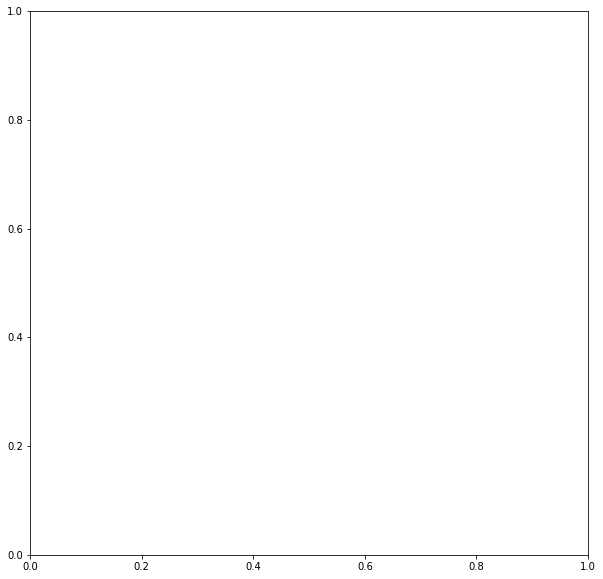

In [164]:
plt.figure(figsize = (10,10))
plt.scatter(X_holdout_preds, y_test, c = "green", marker = "s", label = "Train data")
plt.title("Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='red')
plt.tight_layout()

# Kaggle Trial 1

**First modeling trial after data cleaning and feature generation using only numerical columns instantiated above. (Contains interaction terms and single numerical columns)**

In [142]:
X2 = df[num_features]
y2 = df['SalePrice']

In [143]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42)

In [144]:
# Instantiate Linear Regression
lr = LinearRegression()

# Fit the model
lr.fit(X2_train, y2_train)

# See cross-val score
print(cross_val_score(lr, X2_train, y2_train).mean())

print('')

# See score
print(lr.score(X2_test, y2_test))

0.7189359782468441

0.83600417338325


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [145]:
X2_train.shape

(1538, 12)

In [146]:
ss = StandardScaler()
ss.fit(X2_train, y2_train)

X2_train_sc = ss.transform(X2_train)
X2_test_sc = ss.transform(X2_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [147]:
X2_holdout = df_to_kaggle[num_features]

In [148]:
X2_holdout.head()

,Lot Frontage * Lot Area,Overall Qual,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Full Bath * Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars * Garage Area,Garage Yr Blt,Wood Deck * Open Porch
0,630798.0,6,1950,0.0,1020,1928,0,9,0,440,1910.0,0
1,0.0,5,1977,0.0,1967,1967,0,10,0,1160,1977.0,0
2,992032.0,7,2006,0.0,654,1496,2,7,1,852,2006.0,2400
3,511200.0,5,2006,0.0,968,968,0,5,0,960,1935.0,0
4,0.0,6,1963,247.0,1394,1394,1,6,2,1028,1963.0,0


In [149]:
X2_holdout['Id'] = df_to_kaggle['Id']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
X2_holdout['SalePrice'] = lr.predict(X2_holdout.drop('Id', axis = 1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
X2_holdout.head()

,Lot Frontage * Lot Area,Overall Qual,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Full Bath * Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars * Garage Area,Garage Yr Blt,Wood Deck * Open Porch,Id,SalePrice
0,630798.0,6,1950,0.0,1020,1928,0,9,0,440,1910.0,0,2658,151601.013239
1,0.0,5,1977,0.0,1967,1967,0,10,0,1160,1977.0,0,2718,195801.530443
2,992032.0,7,2006,0.0,654,1496,2,7,1,852,2006.0,2400,2414,199227.763971
3,511200.0,5,2006,0.0,968,968,0,5,0,960,1935.0,0,1989,133497.472570
4,0.0,6,1963,247.0,1394,1394,1,6,2,1028,1963.0,0,625,201425.179116


In [152]:
X2_holdout_final = X2_holdout[['Id', 'SalePrice']]
X2_holdout_final.set_index('Id', inplace = True)

In [153]:
X2_holdout_final.to_csv('../all submissions/kaggle1')

# Kaggle Trial 2

# Modeling - Lasso Regression

In [154]:
# Instantiate Lasso Regression
lasso = LassoCV()

# Fit the model
lasso.fit(X2_train_sc, y2_train)

# See cross-val score
print(cross_val_score(lasso, X2_train_sc, y2_train).mean())

print('')

# See score
print(lasso.score(X2_test_sc, y2_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.72119639207104

0.8239315951280555


In [155]:
lasso.coef_

array([   -0.        , 28733.34242122,  5760.5585859 ,  4003.2576487 ,
        7409.74022546, 16641.60004162,     0.        ,     0.        ,
        3767.82724112, 14240.42433807,   127.78001177,     0.        ])

In [156]:
num_features

['Lot Frontage * Lot Area',
 'Overall Qual',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Full Bath * Half Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars * Garage Area',
 'Garage Yr Blt',
 'Wood Deck * Open Porch']

In [157]:
X3_holdout = df_to_kaggle[num_features]

In [158]:
X3_holdout.head()

,Lot Frontage * Lot Area,Overall Qual,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Full Bath * Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars * Garage Area,Garage Yr Blt,Wood Deck * Open Porch
0,630798.0,6,1950,0.0,1020,1928,0,9,0,440,1910.0,0
1,0.0,5,1977,0.0,1967,1967,0,10,0,1160,1977.0,0
2,992032.0,7,2006,0.0,654,1496,2,7,1,852,2006.0,2400
3,511200.0,5,2006,0.0,968,968,0,5,0,960,1935.0,0
4,0.0,6,1963,247.0,1394,1394,1,6,2,1028,1963.0,0


In [159]:
X3_holdout_preds = lasso.predict(X3_holdout)

In [160]:
X3_holdout.loc[:, 'SalePrice'] = X3_holdout_preds
X3_holdout.loc[:, 'Id'] = df_to_kaggle['Id']

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [161]:
X3_holdout[['Id', 'SalePrice']].set_index('Id').head()

,SalePrice
Id,
2658,5.773934e+07
2718,7.579385e+07
2414,5.407262e+07
1989,4.908017e+07
625,6.107534e+07


In [162]:
X3_holdout_final = X3_holdout[['Id', 'SalePrice']].set_index('Id')
X3_holdout_final.to_csv('../all submissions/kaggle2')